In [ ]:
# Cell 1: Setup (FIXED)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import joblib
import json
import os

# Set style AFTER import
sns.set_style("whitegrid")
%matplotlib inline

# Create folders
os.makedirs('model', exist_ok=True)
os.makedirs('plots', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Load data
df = pd.read_csv('lg_customer_data.csv')
print("Data loaded!")
print(df.head())

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

NameError: name 'df' is not defined

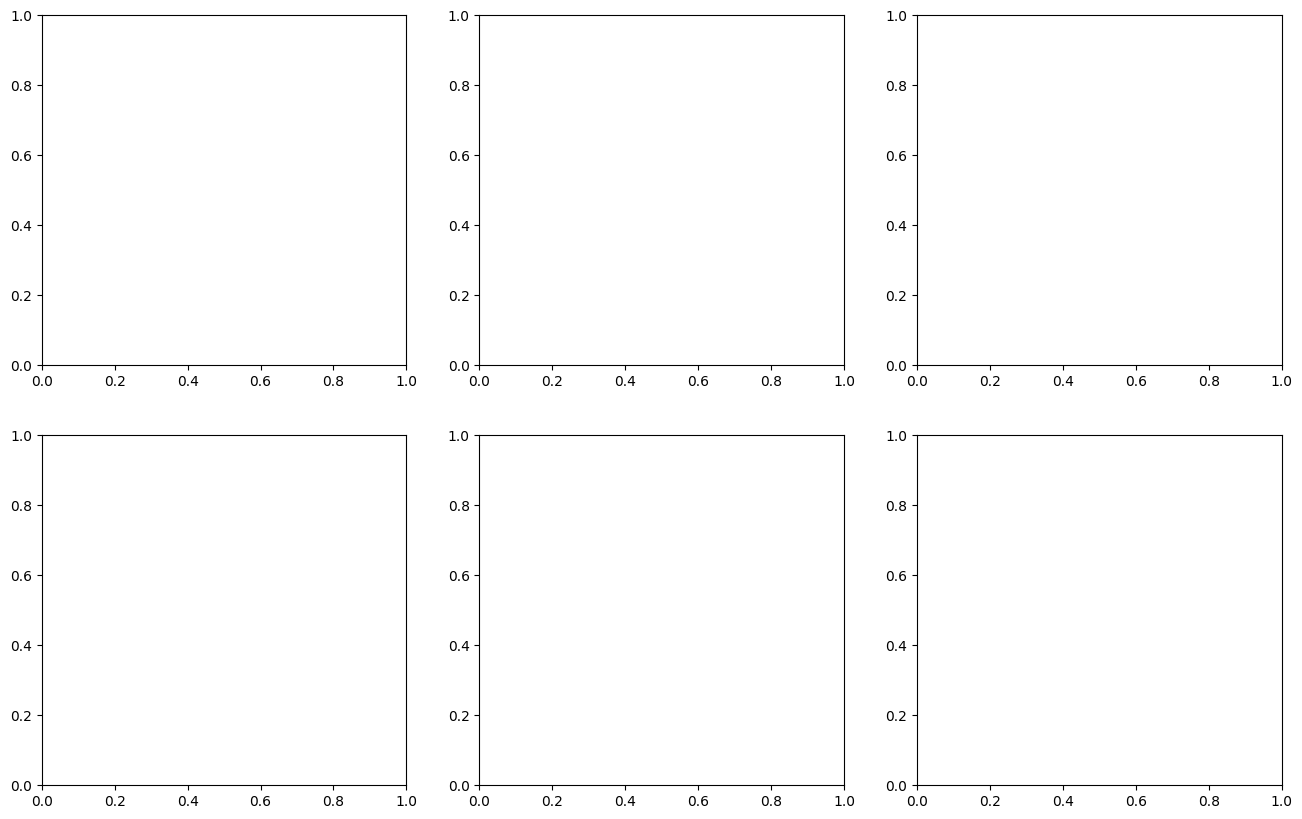

In [ ]:
# Cell 2: EDA
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.histplot(df['Age'], kde=True, ax=axes[0,0]); axes[0,0].set_title('Age')
sns.boxplot(data=df, x='Location', y='Income', ax=axes[0,1]); axes[0,1].set_title('Income by Location')
sns.scatterplot(data=df, x='Monetary', y='Frequency', hue='Pref_Score', ax=axes[0,2])
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', ax=axes[1,0])
df.groupby('Product')['Spend'].mean().plot(kind='bar', ax=axes[1,1]); axes[1,1].set_title('Avg Spend')
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1,2])
plt.tight_layout()
plt.savefig('plots/eda_plots.png')
plt.show()

In [ ]:
# Cell 3: K-means Clustering
features = ['Recency', 'Frequency', 'Monetary', 'Age', 'Income', 'Pref_Score']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow + Silhouette
inertias, sils = [], []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, km.labels_))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(range(2,11), inertias, 'bo-'); ax[0].set_title('Elbow')
ax[1].plot(range(2,11), sils, 'ro-'); ax[1].set_title('Silhouette')
plt.savefig('plots/clustering_eval.png')
plt.show()

# K=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

NameError: name 'df' is not defined

In [ ]:
# Cell 4: Segment Profiles & Strategies
segment_stats = df.groupby('Segment')[features].mean().round(2)
print("Segment Stats:\n", segment_stats)

# Label segments (based on stats)
labels = {
    0: "Budget Rural Families",
    1: "Tech-Savvy Urbanites",
    2: "Loyal Appliance Buyers",
    3: "Occasional Young Shoppers"
}
df['Segment_Label'] = df['Segment'].map(labels)

strategies = {
    "Budget Rural Families": "Discount bundles + free delivery",
    "Tech-Savvy Urbanites": "Premium TV upsell + early access",
    "Loyal Appliance Buyers": "Loyalty points on repeat buys",
    "Occasional Young Shoppers": "Social media flash sales"
}

# Save model
joblib.dump({'kmeans': kmeans, 'scaler': scaler, 'features': features, 'labels': labels}, 'model/segmentation_model.pkl')

# Save results
json.dump({'silhouette': silhouette_score(X_scaled, df['Segment']), 'strategies': strategies}, open('results/segment_results.json', 'w'), indent=2)
df.groupby('Segment_Label').size().to_csv('results/segment_summary.csv')

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Monetary', y='Frequency', hue='Segment_Label', palette='Set1')
plt.title('LG Customer Segments')
plt.savefig('plots/segments_plot.png')
plt.show()

NameError: name 'df' is not defined